In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Example1: Swain vs. Alabama ##

In [4]:
population_proportions = make_array(.26, .74)
population_proportions

array([0.26, 0.74])

In [8]:
sample_proportions(100, population_proportions)

array([0.29, 0.71])

In [9]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [12]:
panel_proportion()

0.21

In [13]:
panels = make_array()

for i in np.arange(1000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)
panels
Table().with_column('Number of Black Men on Panel of 100', panels)

Number of Black Men on Panel of 100
28
28
29
32
32
21
35
18
27
18


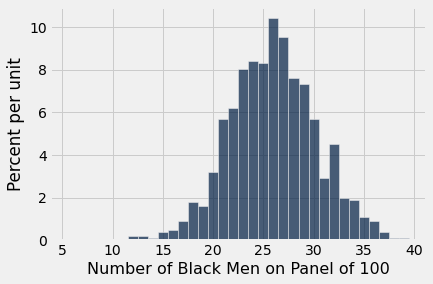

In [14]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

## Example 2: Jury Panels ##

In [15]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


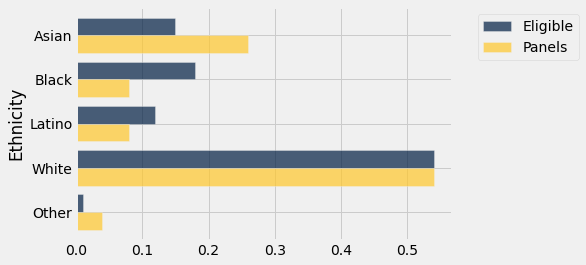

In [16]:
jury.barh('Ethnicity')

In [19]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [22]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

array([0.13562895, 0.1883345 , 0.12157414, 0.54462403, 0.00983837])

In [23]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.135629
Black,0.18,0.08,0.188335
Latino,0.12,0.08,0.121574
White,0.54,0.54,0.544624
Other,0.01,0.04,0.00983837


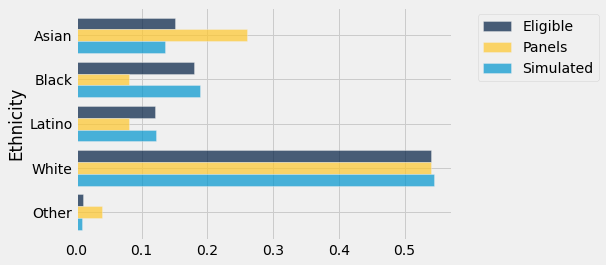

In [24]:
jury_with_simulated.barh('Ethnicity')

### Distance Between Distributions

In [25]:
# In the last lecture, the difference between observed black/purple
# and their expected values (26%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


### Total Variation Distance

In [27]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [30]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14

In [33]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.014181307097680956

In [35]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)
tvds

10000

Observed TVD: 0.14


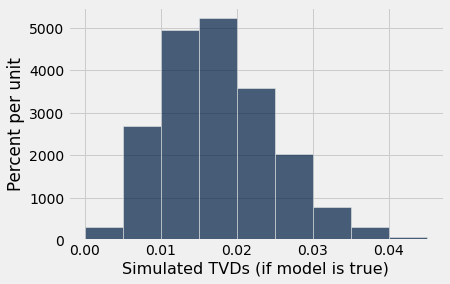

In [36]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))